In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
d=pd.read_csv(r"C:\Users\sanjoy\Downloads\csv\dia.csv")
sppp=pd.read_csv(r"C:\Users\sanjoy\Downloads\csv\car_sales.csv")
self=pd.read_csv(r"C:\Users\sanjoy\Downloads\csv\salary_data.csv")
sl=pd.read_csv(r"C:\Users\sanjoy\Downloads\csv\car.csv",encoding='ISO-8859-1')

In [12]:
self.head()

,milestraveled,numdeliveris,gasprice,traveltime
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.88,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8


In [13]:
d.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [15]:
d[cols_to_norm]=d[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [16]:
d.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [17]:
d.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [18]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [19]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

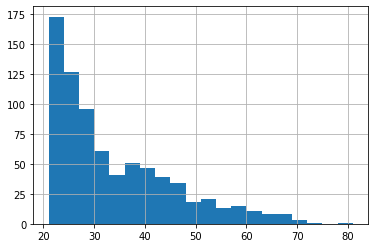

In [20]:
d['Age'].hist(bins=20)

In [21]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [22]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [23]:
x_data = d.drop('Class', axis=1) 
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [24]:
labels = d['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [27]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A


In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmpau0rp_pb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F12F568C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sanjoy\App

In [31]:
#Eval the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-11T22:30:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmpau0rp_pb\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-11-22:30:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.79794234, auc_precision_recall = 0.6505028, average_loss = 0.5270253, global_step = 1000, label/mean = 0.35064936, loss = 5.0726185, precision = 0.64179105, prediction/mean = 0.35989633, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sanjoy\AppData\Local\Temp\tmpau0rp_pb\model.ckpt-1000


In [33]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79794234,
 'auc_precision_recall': 0.6505028,
 'average_loss': 0.5270253,
 'label/mean': 0.35064936,
 'loss': 5.0726185,
 'precision': 0.64179105,
 'prediction/mean': 0.35989633,
 'recall': 0.5308642,
 'global_step': 1000}

In [34]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [35]:
predictions = model.predict(pred_input_func)

In [36]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmpau0rp_pb\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.01492476], dtype=float32),
  'logistic': array([0.49626887], dtype=float32),
  'probabilities': array([0.50373113, 0.49626887], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5171219], dtype=float32),
  'logistic': array([0.6264745], dtype=float32),
  'probabilities': array([0.37352547, 0.62647456], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.4878409], dtype=float32),
  'logistic': array([0.38040233], dtype=float32),
  'probabilities': array([0.6195977 , 0.38040233], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

In [37]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmpofs_pnid', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F15C2D948>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sanjoy\AppData\Local\Temp\tmpofs_pnid\model.ckpt.
INFO:tensorflow:loss = 6.8840537, step = 1
INFO:tensorflow:global_step/sec: 245.499
INFO:tensorflow:loss = 6.8419433, step = 101 (0.409 sec)
INFO:tensorflow:global_step/sec: 185.899
INFO:tensorflow:loss = 5.0101767, step = 201 (0.548 sec)
INFO:tensorflow:global_step/sec: 208.678
INFO:tensorflow:loss = 5.184475, step = 301 (0.475 sec)
INFO:tensorflow:global_step/sec: 268.959
INFO:tensorflow:loss = 5.5642443, step = 401 (0.379 sec)
INFO:tensorflow:global_step/sec: 259.696
INFO:tensorflow:loss = 4.8502617, step = 501 (0.369 sec)
INFO:ten

In [39]:
#embedded_group_col=tf.feature.embedding_column(assigned_group,dimension=4)

In [40]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [41]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanjoy\\AppData\\Local\\Temp\\tmps_vcrx4b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F15CAD8C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sanjoy\AppData\Local\Temp\tmps_vcrx4b\model.ckpt.
INFO:tensorflow:loss = 8.476868, step = 1
INFO:tensorflow:global_step/sec: 259.617
INFO:tensorflow:loss = 5.001057, step = 101 (0.385 sec)
INFO:tensorflow:global_step/sec: 301.445
INFO:tensorflow:loss = 3.9806983, step = 201 (0.332 sec)
INFO:tensorflow:global_step/sec: 316.172
INFO:tensorflow:loss = 4.7715783, step = 301 (0.332 sec)
INFO:tensorflow:global_step/sec: 210.493
INFO:tensorflow:loss = 5.727598, step = 401 (0.469 sec)
INFO:tensorflow:global_step/sec: 276.179
INFO:tensorflow:loss = 2.9628158, step = 501 (0.353 sec)
INFO:tensorflow:global_step/sec: 306.808
INFO:tensorflow:loss = 5.6901345, step = 601 (0.330 sec)
INFO:tensorflow:global_step/se

In [43]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [44]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-11T22:31:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sanjoy\AppData\Local\Temp\tmps_vcrx4b\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-11-22:32:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8288065, auc_precision_recall = 0.6893284, average_loss = 0.49096805, global_step = 1000, label/mean = 0.35064936, loss = 4.9096804, precision = 0.6627907, prediction/mean = 0.40405154, recall = 0.7037037
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sanjoy\AppData\Local\Temp\tmps_vcrx4b\model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8288065,
 'auc_precision_recall': 0.6893284,
 'average_loss': 0.49096805,
 'label/mean': 0.35064936,
 'loss': 4.9096804,
 'precision': 0.6627907,
 'prediction/mean': 0.40405154,
 'recall': 0.7037037,
 'global_step': 1000}